**PCA**




Task 1: Exploratory Data Analysis (EDA):

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
dataset = pd.read_csv('/content/wine.csv')

In [ ]:
df = pd.DataFrame(dataset)

In [ ]:
df

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0       1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1       1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2       1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3       1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4       1    13.24   2.59  2.87        21.0        118     2.80        2.69   
..    ...      ...    ...   ...         ...        ...      ...         ...   
173     3    13.71   5.65  2.45        20.5         95     1.68        0.61   
174     3    13.40   3.91  2.48        23.0        102     1.80        0.75   
175     3    13.27   4.28  2.26        20.0        120     1.59        0.69   
176     3    13.17   2.59  2.37        20.0        120     1.65        0.68   
177     3    14.13   4.10  2.74        24.5         96     2.05        0.76   

     Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0             0.28             2.29   5.64  1.04      3.92     1065  
1             0.26             1.28   4.38  1.05      3.40     1050  
2             0.30             2.81   5.68  1.03      3.17     1185  
3             0.24             2.18   7.80  0.86      3.45     1480  
4             0.39             1.82   4.32  1.04      2.93      735  
..             ...              ...    ...   ...       ...      ...  
173           0.52             1.06   7.70  0.64      1.74      740  
174           0.43             1.41   7.30  0.70      1.56      750  
175           0.43             1.35  10.20  0.59      1.56      835  
176           0.53             1.46   9.30  0.60      1.62      840  
177           0.56             1.35   9.20  0.61      1.60      560  

[178 rows x 14 columns]

In [ ]:
print(df.head())

   Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735  


In [ ]:
print(df.tail())

     Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
173     3    13.71   5.65  2.45        20.5         95     1.68        0.61   
174     3    13.40   3.91  2.48        23.0        102     1.80        0.75   
175     3    13.27   4.28  2.26        20.0        120     1.59        0.69   
176     3    13.17   2.59  2.37        20.0        120     1.65        0.68   
177     3    14.13   4.10  2.74        24.5         96     2.05        0.76   

     Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
173           0.52             1.06    7.7  0.64      1.74      740  
174           0.43             1.41    7.3  0.70      1.56      750  
175           0.43             1.35   10.2  0.59      1.56      835  
176           0.53             1.46    9.3  0.60      1.62      840  
177           0.56             1.35    9.2  0.61      1.60      560  


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB
None


In [ ]:
print(df.describe())

             Type     Alcohol       Malic         Ash  Alcalinity   Magnesium  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean     1.938202   13.000618    2.336348    2.366517   19.494944   99.741573   
std      0.775035    0.811827    1.117146    0.274344    3.339564   14.282484   
min      1.000000   11.030000    0.740000    1.360000   10.600000   70.000000   
25%      1.000000   12.362500    1.602500    2.210000   17.200000   88.000000   
50%      2.000000   13.050000    1.865000    2.360000   19.500000   98.000000   
75%      3.000000   13.677500    3.082500    2.557500   21.500000  107.000000   
max      3.000000   14.830000    5.800000    3.230000   30.000000  162.000000   

          Phenols  Flavanoids  Nonflavanoids  Proanthocyanins       Color  \
count  178.000000  178.000000     178.000000       178.000000  178.000000   
mean     2.295112    2.029270       0.361854         1.590899    5.058090   
std      0.625851    0.998859       0.1

In [ ]:
print(df.isnull().sum())

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64


In [ ]:
print(df.shape)

(178, 14)


In [ ]:
print(df.dtypes)

Type                 int64
Alcohol            float64
Malic              float64
Ash                float64
Alcalinity         float64
Magnesium            int64
Phenols            float64
Flavanoids         float64
Nonflavanoids      float64
Proanthocyanins    float64
Color              float64
Hue                float64
Dilution           float64
Proline              int64
dtype: object


In [ ]:
print(df.columns)

Index(['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'],
      dtype='object')


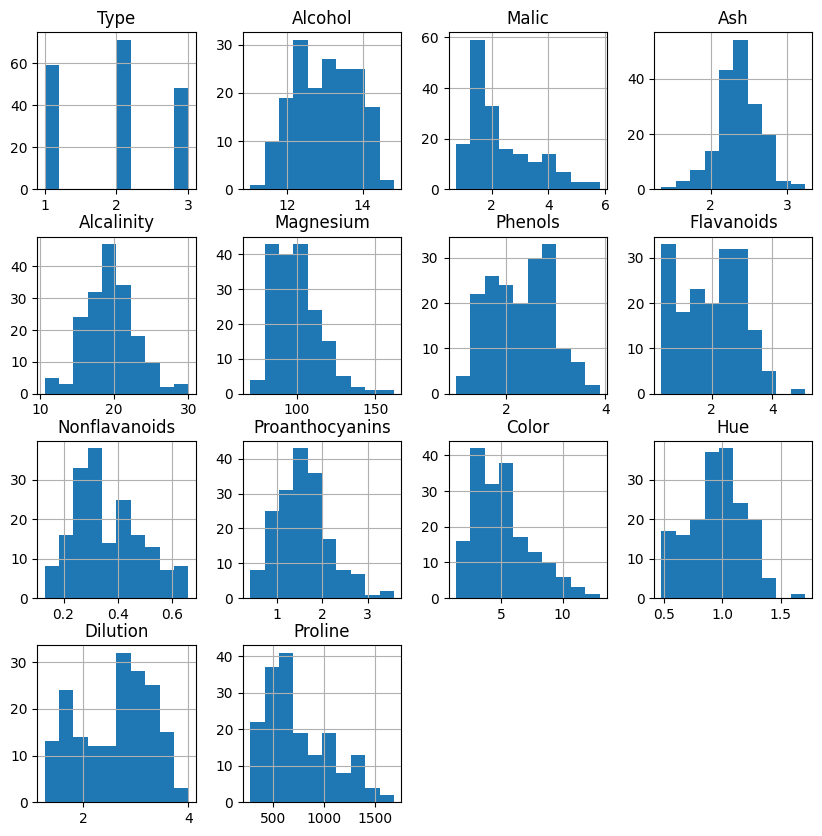

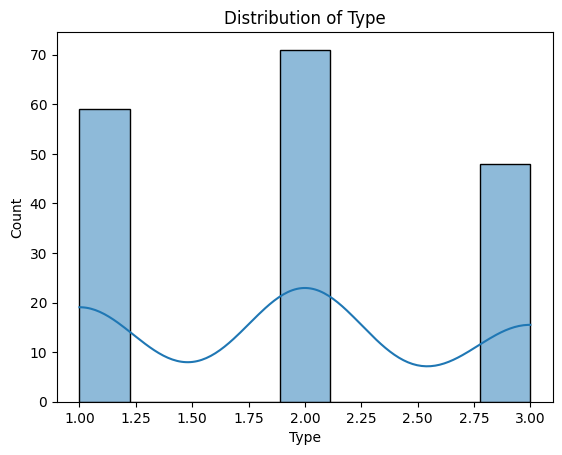

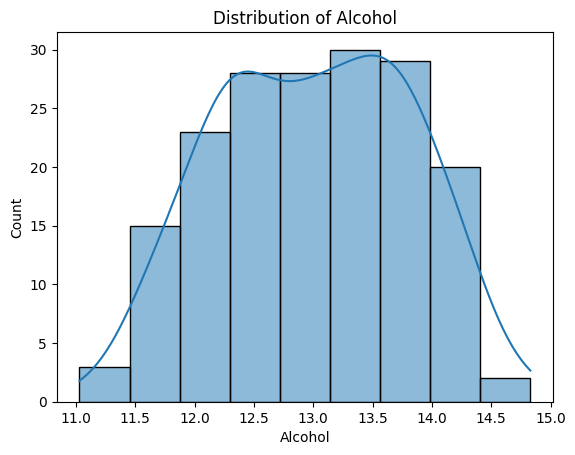

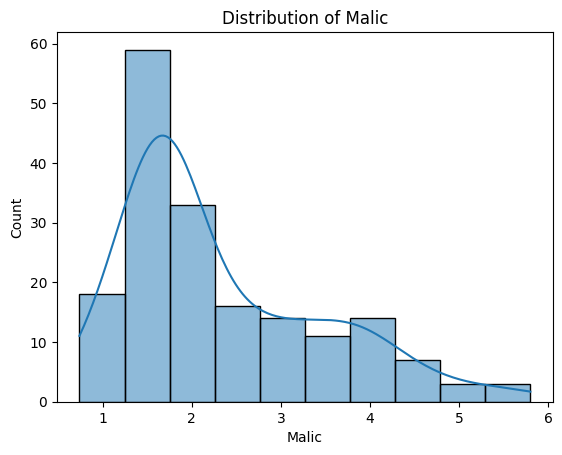

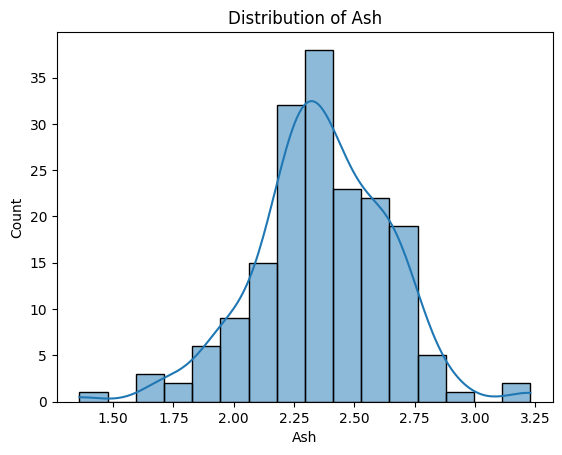

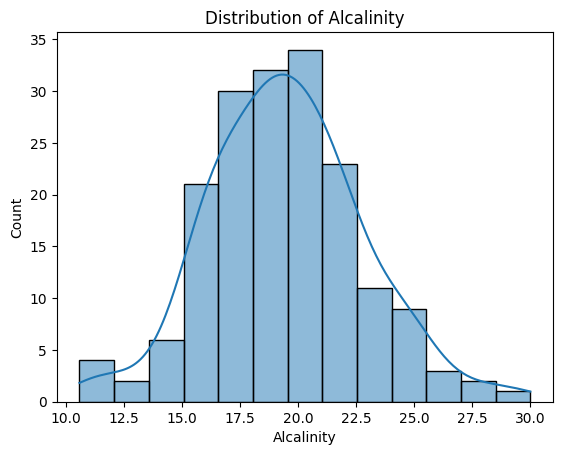

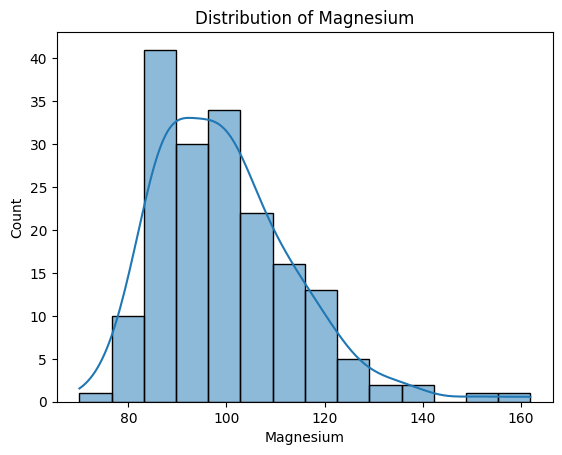

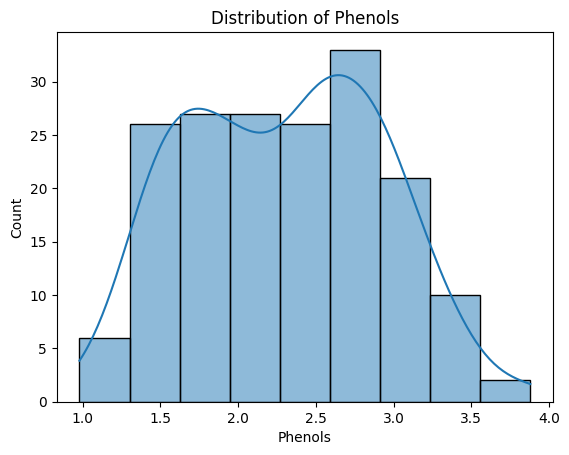

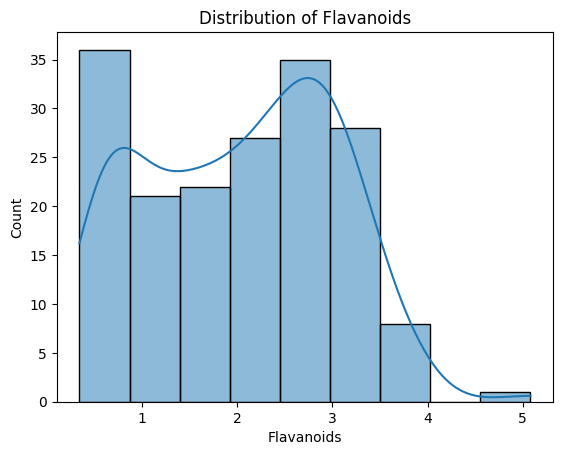

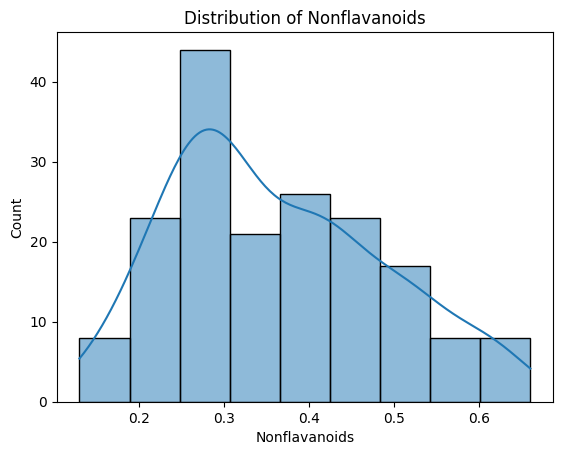

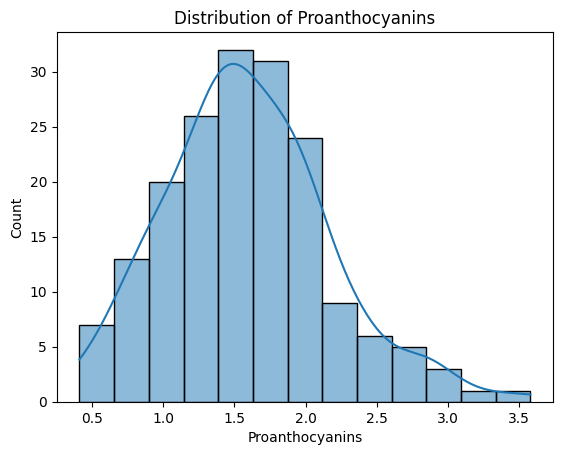

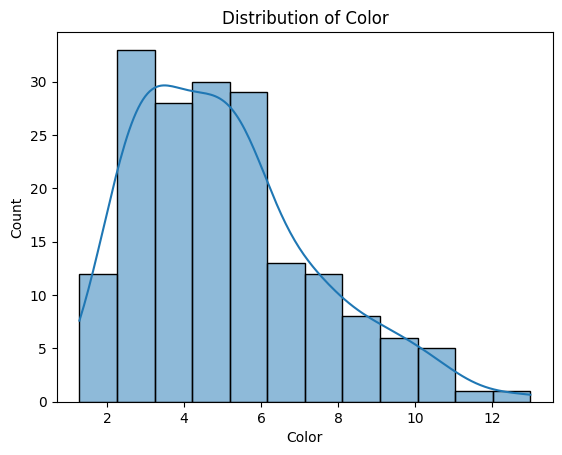

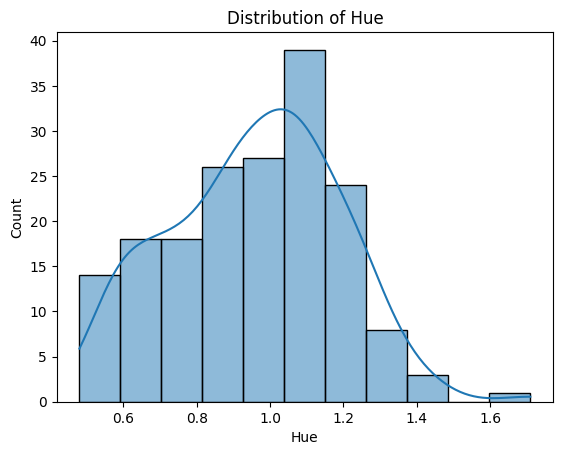

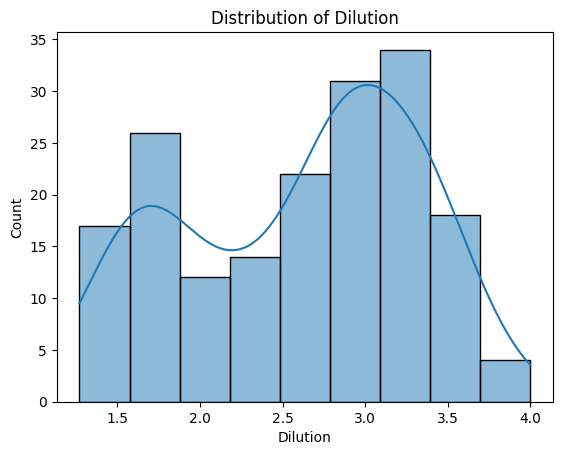

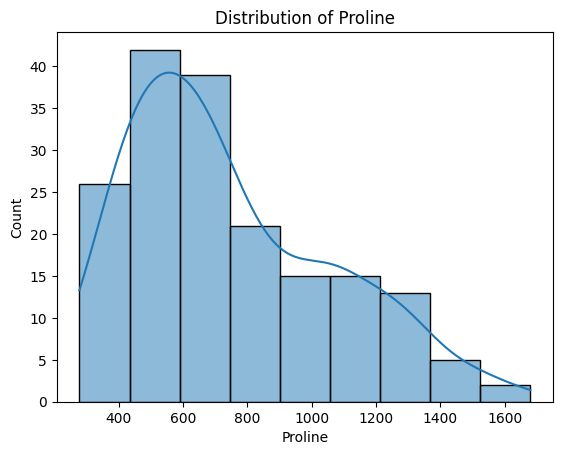

In [ ]:
# Histograms
df.hist(figsize=(10, 10))
plt.show()

# Histograms with KDE
for col in df.columns:
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

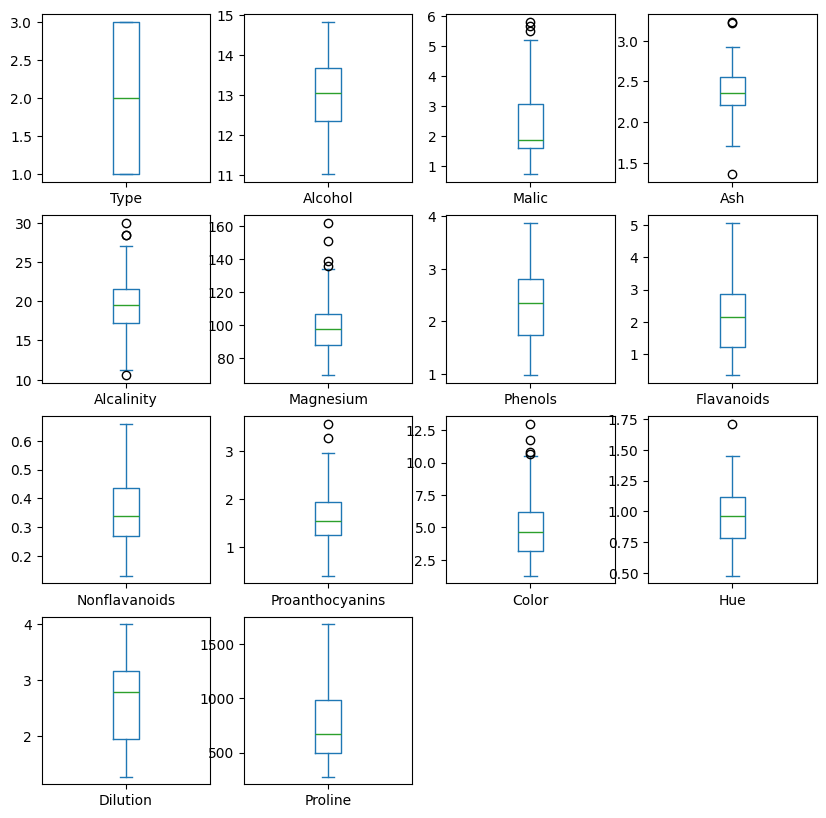

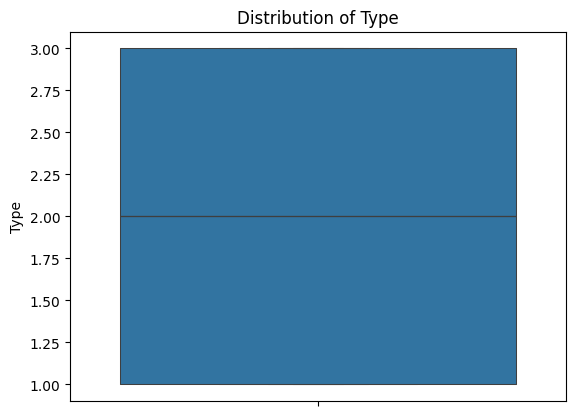

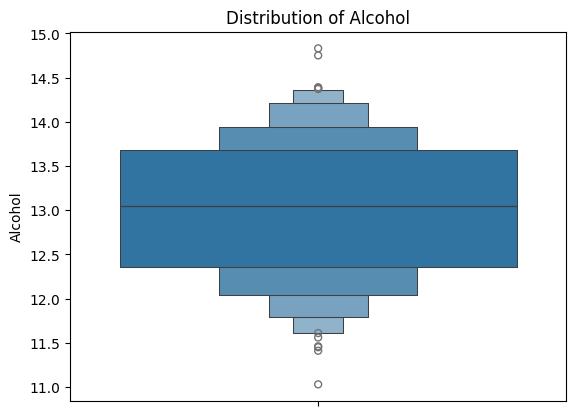

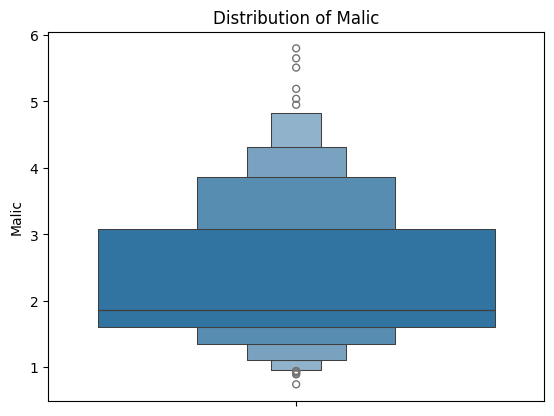

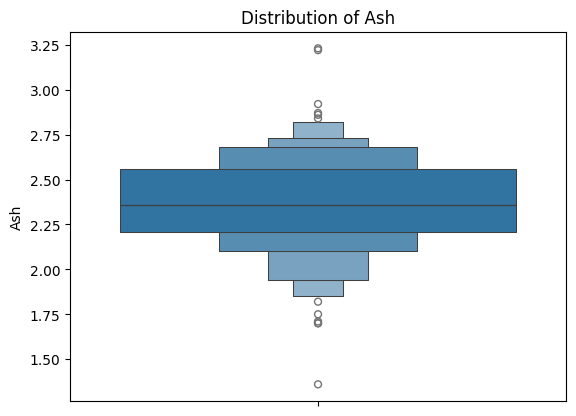

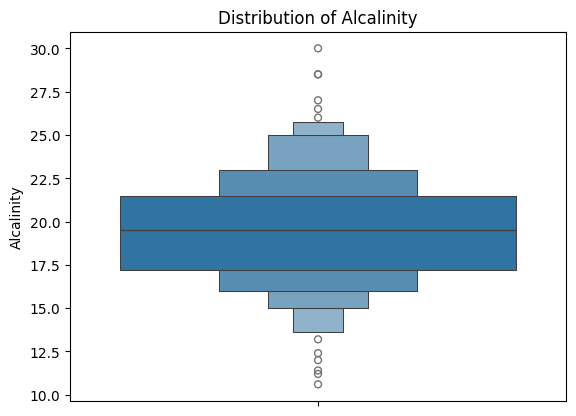

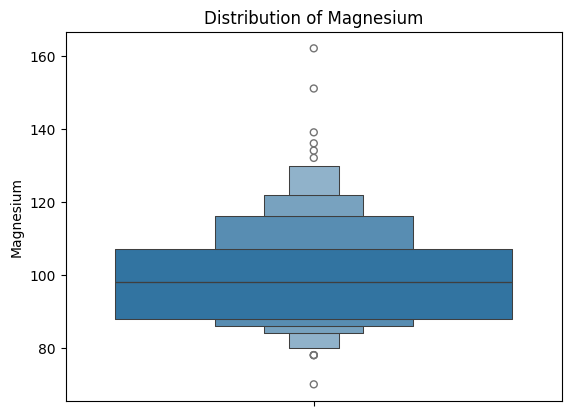

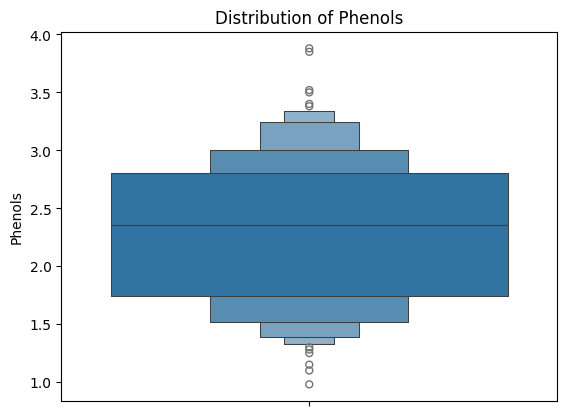

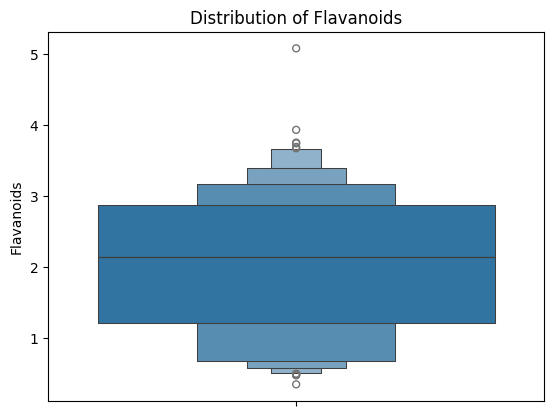

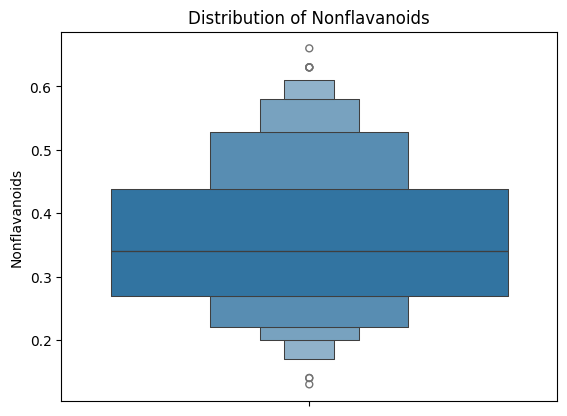

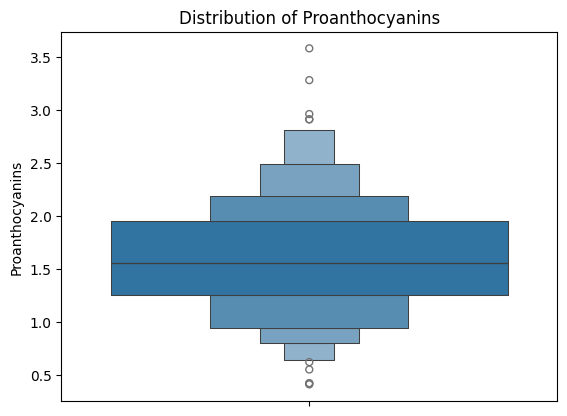

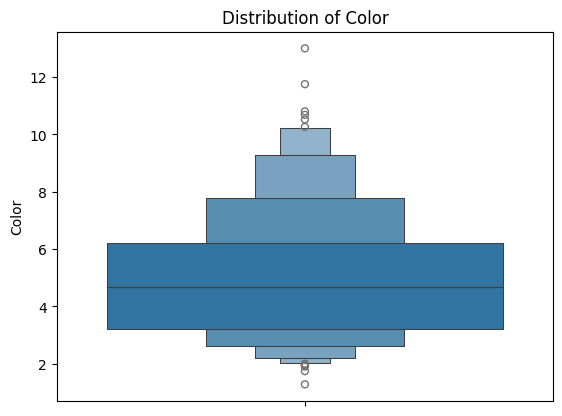

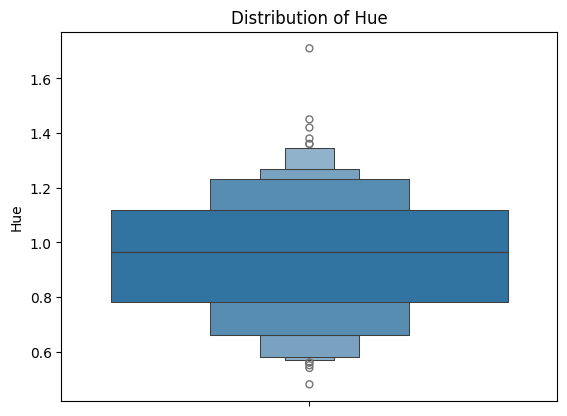

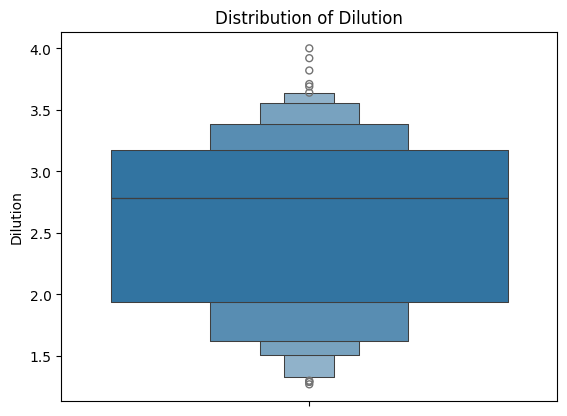

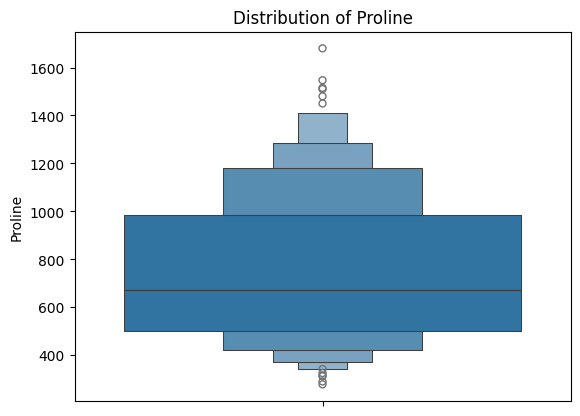

In [ ]:
# Box plots
df.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(10,10))
plt.show()

# Boxenplots (better for large datasets)
for col in df.columns:
  sns.boxenplot(y=df[col])
  plt.title(f'Distribution of {col}')
  plt.show()


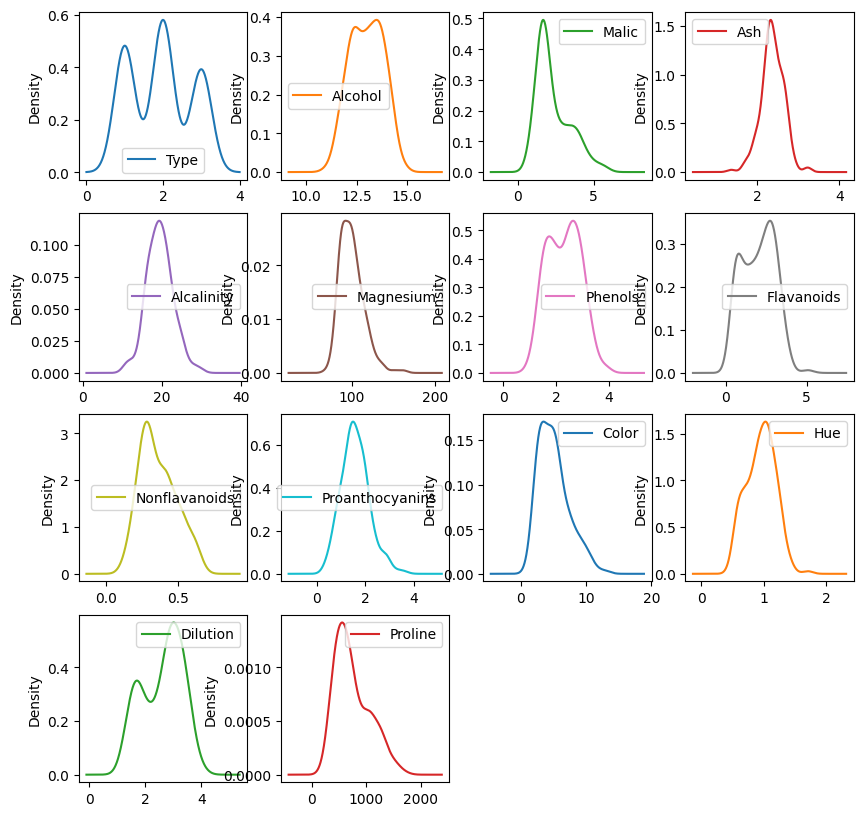

In [ ]:
# Density plots
df.plot(kind='density', subplots=True, layout=(4,4), sharex=False, figsize=(10,10))
plt.show()

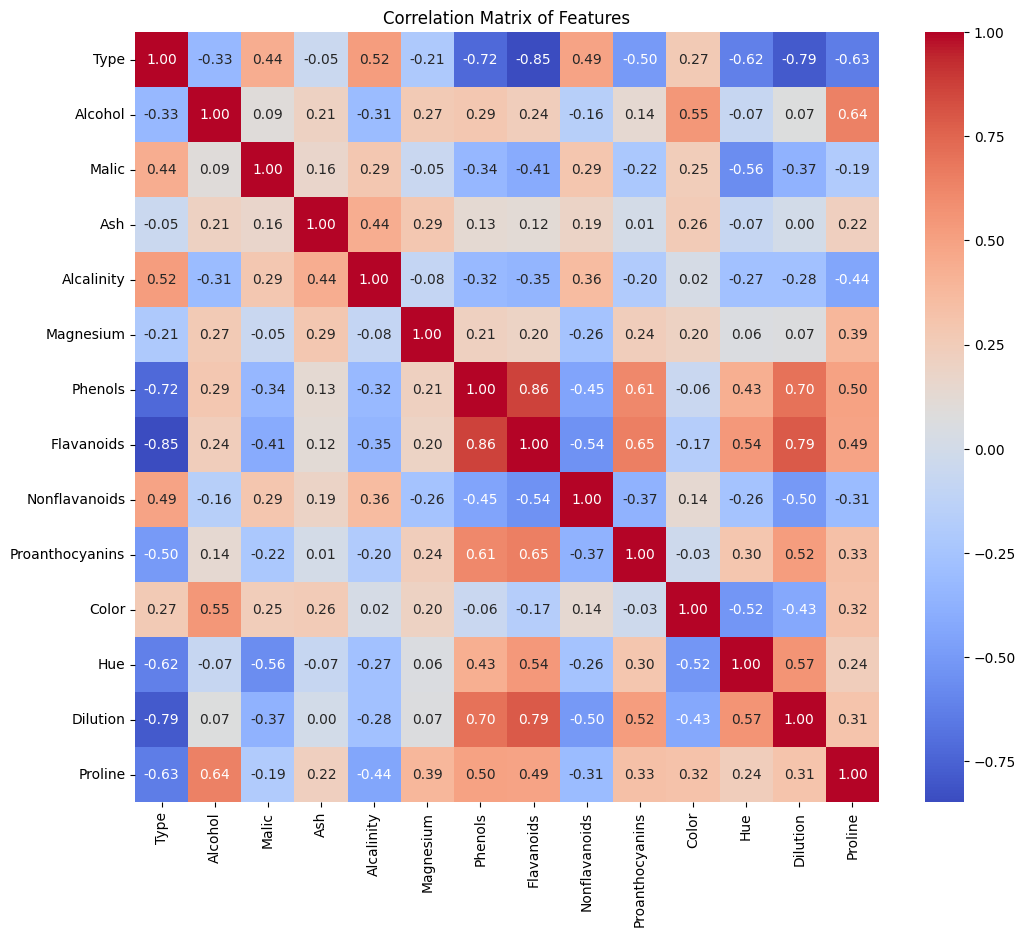

In [ ]:
# Correlation Matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()


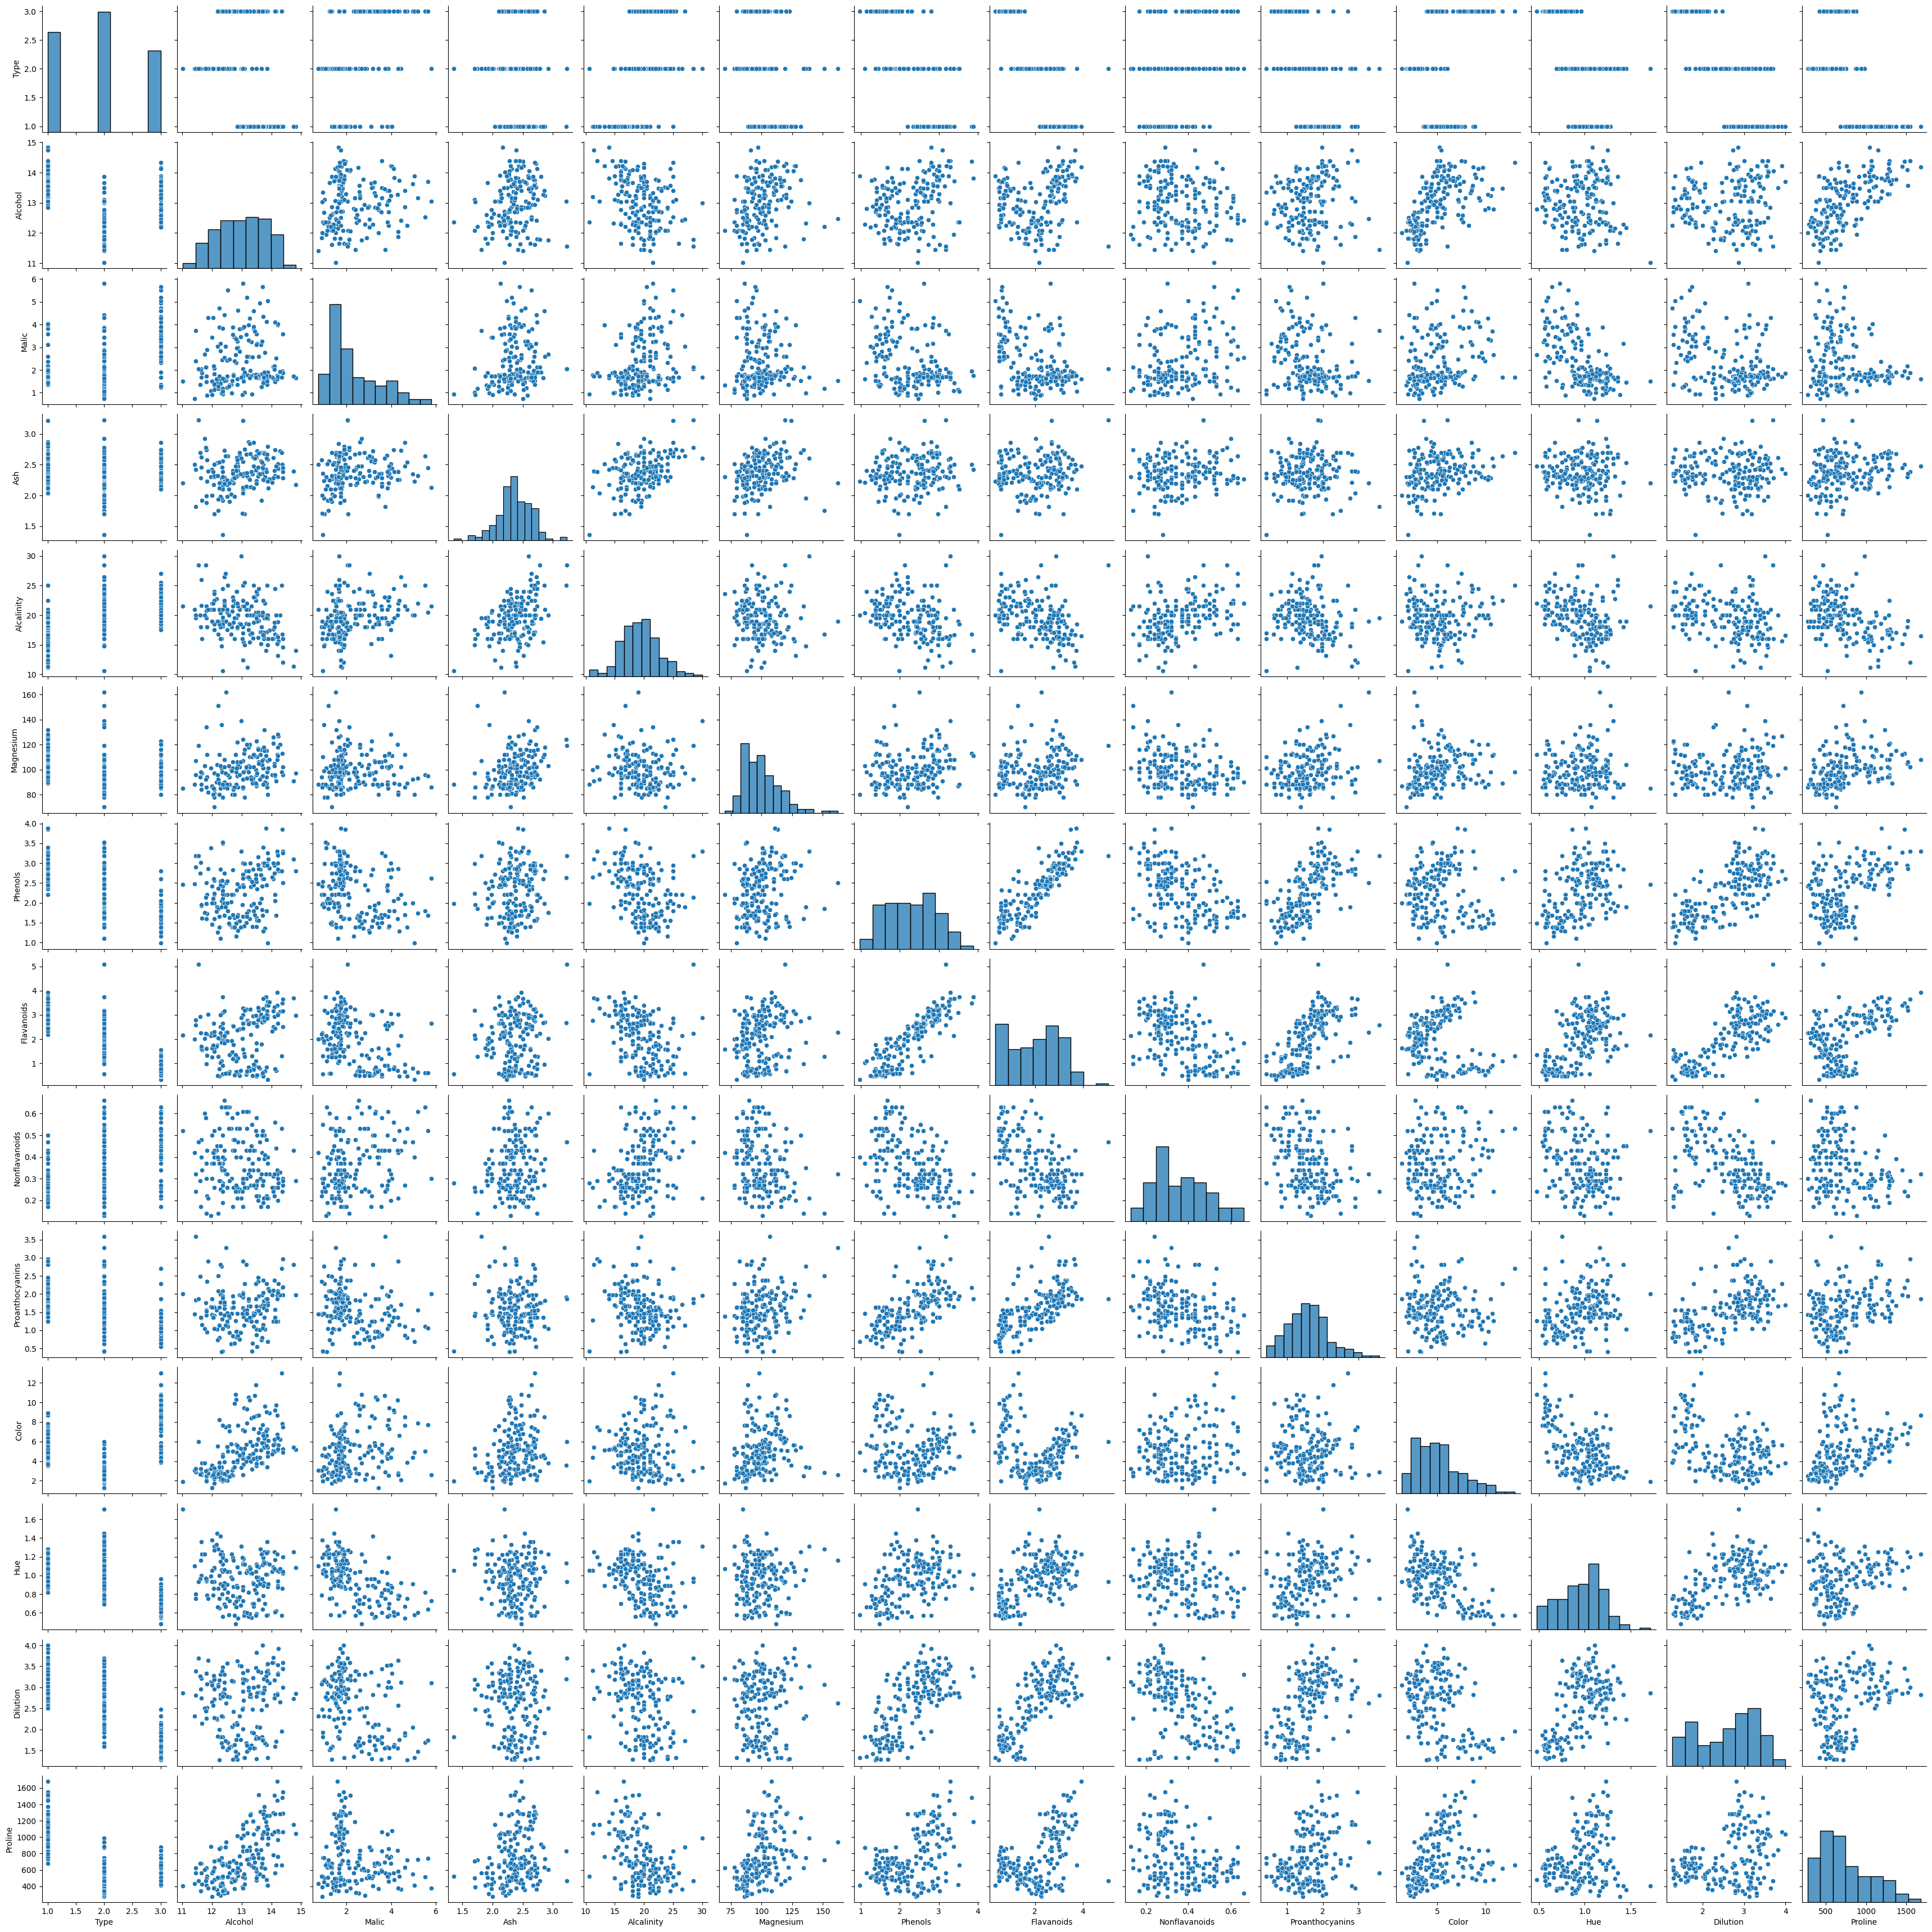

In [ ]:
# Pair Plots
sns.pairplot(df)
plt.show()


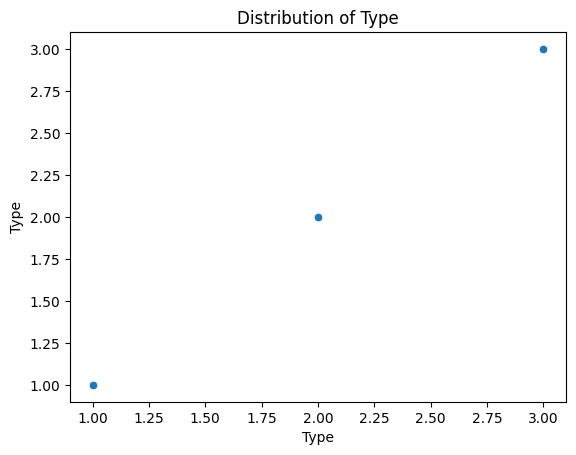

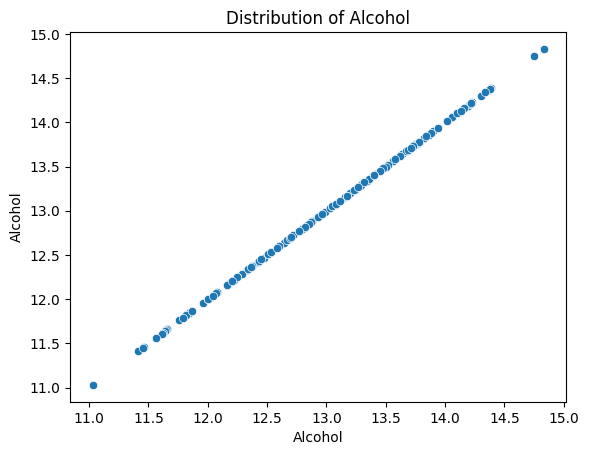

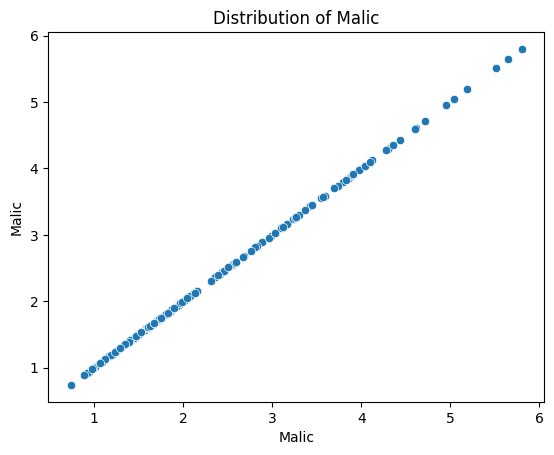

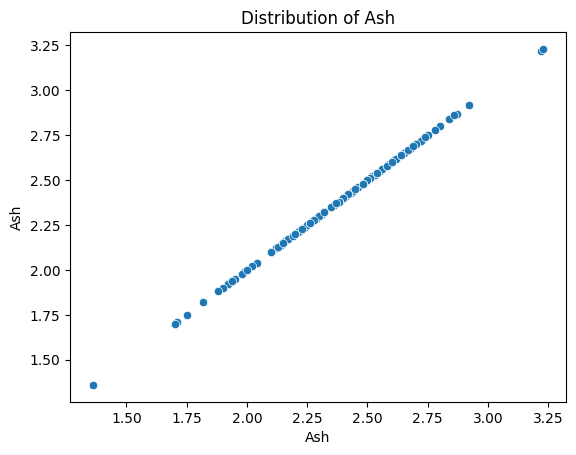

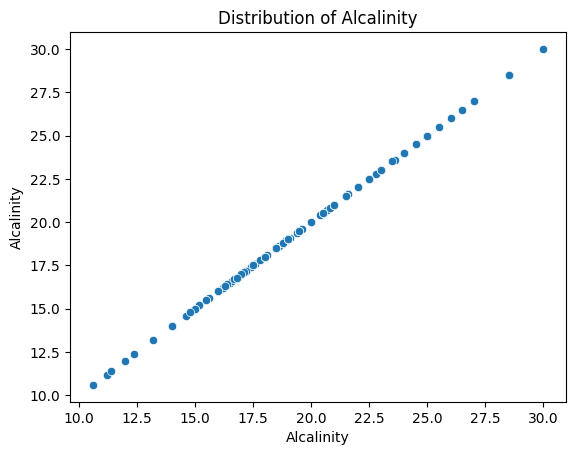

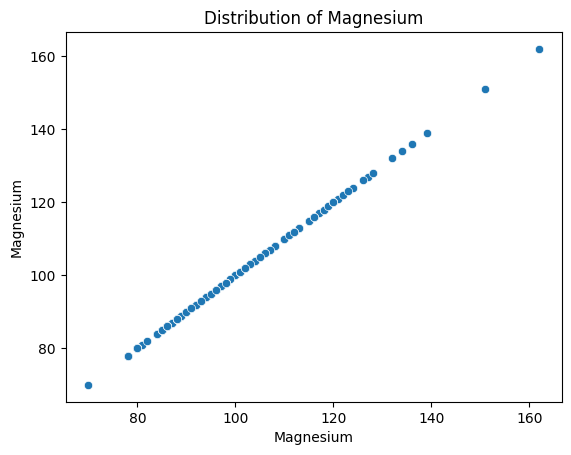

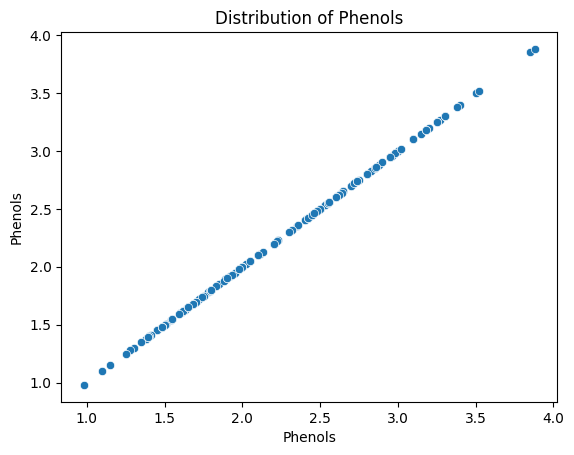

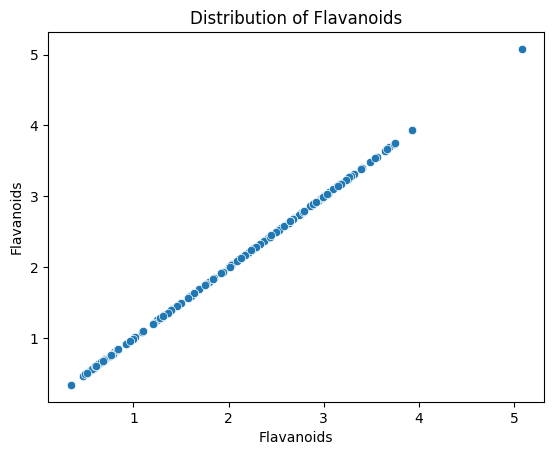

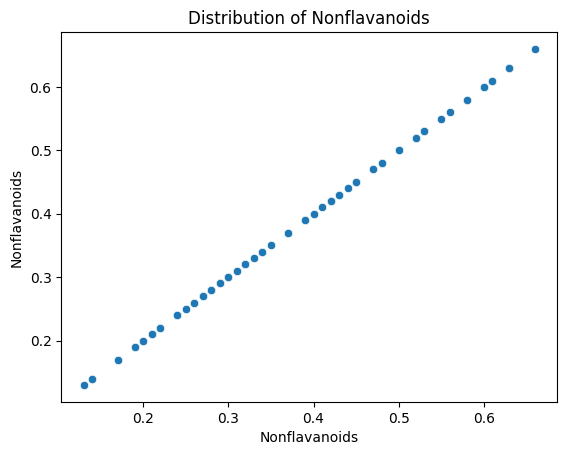

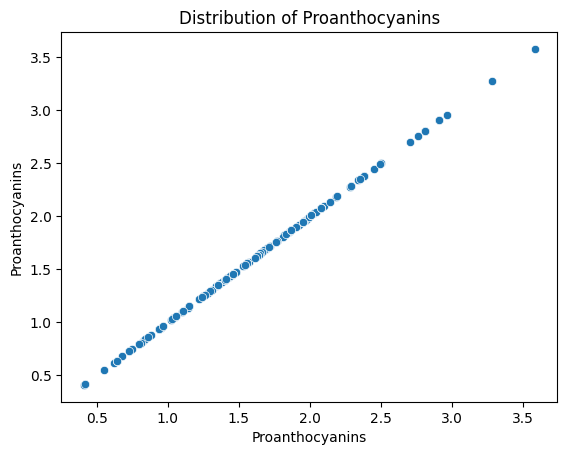

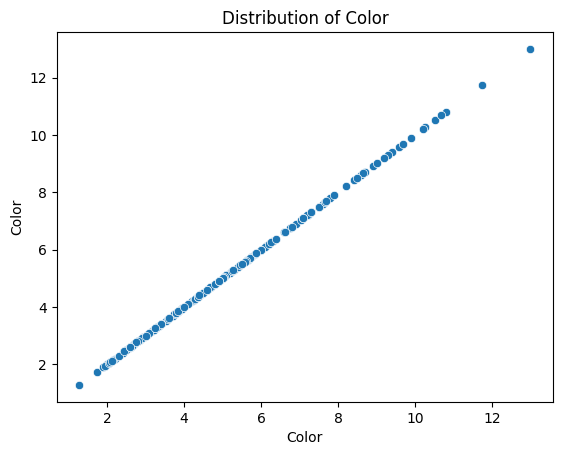

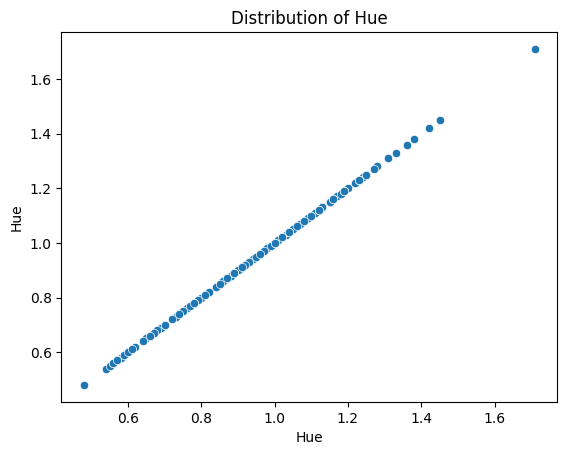

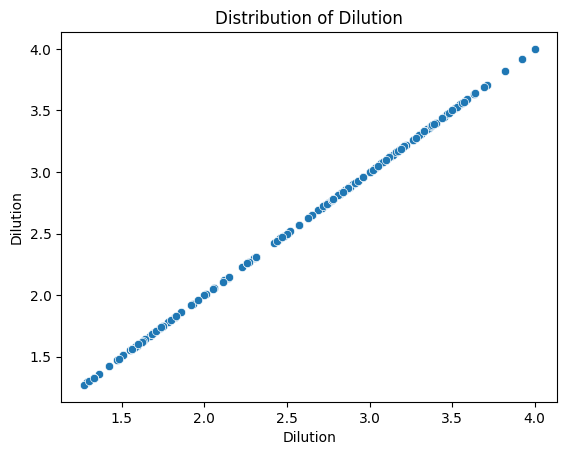

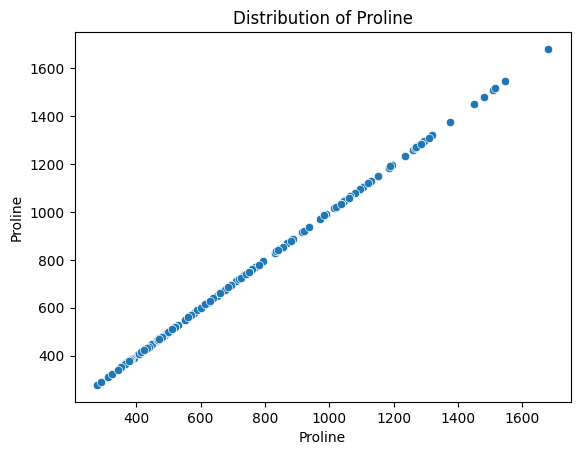

In [ ]:
# scatter plots with KDE
for col in df.columns:
    sns.scatterplot(x=col, y=df[col], data=df)  # Remove kde=True
    # If you want to add KDE, you can use kdeplot separately:
    # sns.kdeplot(df[col])  # Add this line if you want a KDE plot
    plt.title(f'Distribution of {col}')
    plt.show()

In [ ]:
# Replace 'alcohol' with the actual column name
alcohol_quality_correlation = df['Alcohol'].corr(df['Malic'])
print(f"Correlation between Alcohol and Quality: {alcohol_quality_correlation}")

Correlation between Alcohol and Quality: 0.09439694091041397


Task 2: Dimensionality Reduction with PCA:

In [ ]:
 # Standardize the features
scaler = StandardScaler()
data_standardized = scaler.fit_transform(df)

print("Standardized Data:")
print(data_standardized)

Standardized Data:
[[-1.21394365  1.51861254 -0.5622498  ...  0.36217728  1.84791957
   1.01300893]
 [-1.21394365  0.24628963 -0.49941338 ...  0.40605066  1.1134493
   0.96524152]
 [-1.21394365  0.19687903  0.02123125 ...  0.31830389  0.78858745
   1.39514818]
 ...
 [ 1.37386437  0.33275817  1.74474449 ... -1.61212515 -1.48544548
   0.28057537]
 [ 1.37386437  0.20923168  0.22769377 ... -1.56825176 -1.40069891
   0.29649784]
 [ 1.37386437  1.39508604  1.58316512 ... -1.52437837 -1.42894777
  -0.59516041]]


In [ ]:
 #  Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions
principal_components = pca.fit_transform(data_standardized)

# Create a new DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

print("\nPrincipal Components:")
print(pca_df)

# Explained variance ratio
print("\nExplained Variance Ratio:")
print(pca.explained_variance_ratio_)


Principal Components:
          PC1       PC2
0   -3.522934  1.453098
1   -2.528858 -0.330019
2   -2.785029  1.036936
3   -3.922588  2.768210
4   -1.407511  0.867773
..        ...       ...
173  3.627996  2.206617
174  2.942729  1.752263
175  3.027272  2.756040
176  2.755222  2.293784
177  3.496336  2.760608

[178 rows x 2 columns]

Explained Variance Ratio:
[0.39542486 0.17836259]


In [ ]:
# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

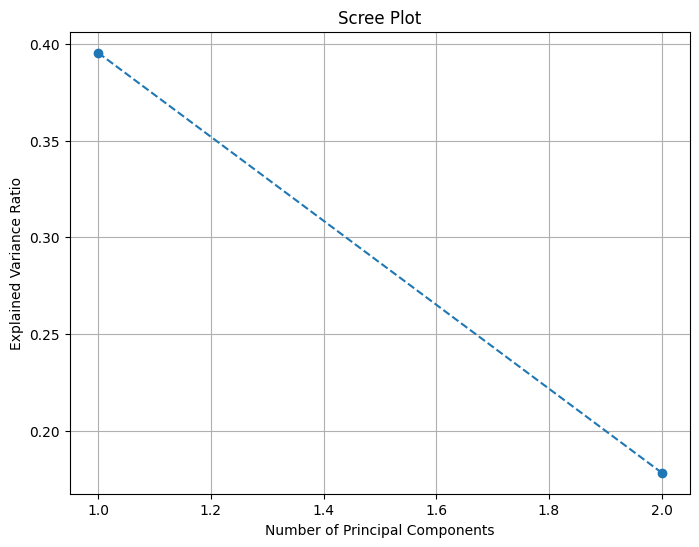

In [ ]:
# Scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

In [ ]:
# Cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratio)

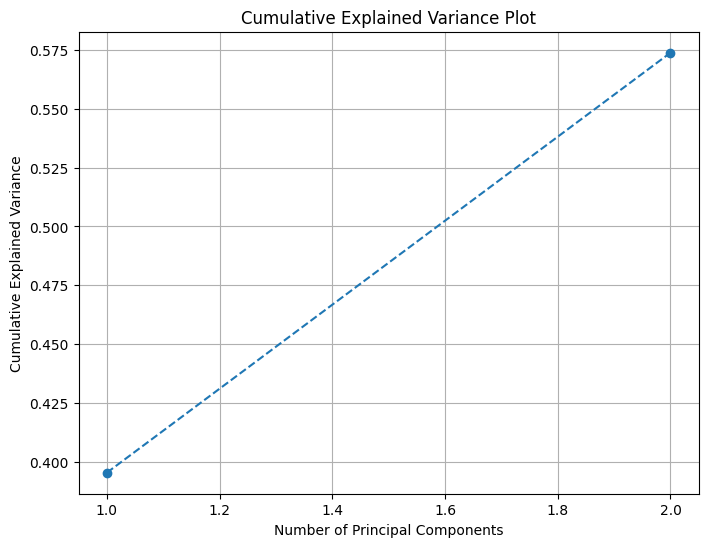

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Plot')
plt.grid(True)
plt.show()


In [ ]:
# Determine the optimal number of components (example: choose components explaining 95% of variance)
optimal_components = np.argmax(cumulative_variance >= 0.95) + 1  # Add 1 because index starts from 0
print(f"\nOptimal number of principal components (explaining 95% variance): {optimal_components}")

# Apply PCA with the optimal number of components
pca_optimal = PCA(n_components=optimal_components)
principal_components_optimal = pca_optimal.fit_transform(data_standardized)

pca_df_optimal = pd.DataFrame(data=principal_components_optimal, columns=[f'PC{i+1}' for i in range(optimal_components)])

print("\nPrincipal Components (Optimal):")
pca_df_optimal


Optimal number of principal components (explaining 95% variance): 1

Principal Components (Optimal):


PC1
0   -3.522934
1   -2.528858
2   -2.785029
3   -3.922588
4   -1.407511
..        ...
173  3.627996
174  2.942729
175  3.027272
176  2.755222
177  3.496336

[178 rows x 1 columns]

In [ ]:
# To access the principal components:

# First two principal components:
print(pca_df.head())

# Optimal number of principal components:
print(pca_df_optimal.head())

        PC1       PC2
0 -3.522934  1.453098
1 -2.528858 -0.330019
2 -2.785029  1.036936
3 -3.922588  2.768210
4 -1.407511  0.867773
        PC1
0 -3.522934
1 -2.528858
2 -2.785029
3 -3.922588
4 -1.407511


In [ ]:

from sklearn.cluster import KMeans

In [ ]:
# For example, using the first two principal components:
X = pca_df

# Determine the optimal number of clusters (k) using the Elbow method or silhouette analysis
# Example using the Elbow method:
inertia = []
for k in range(1, 11):  # Test k from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

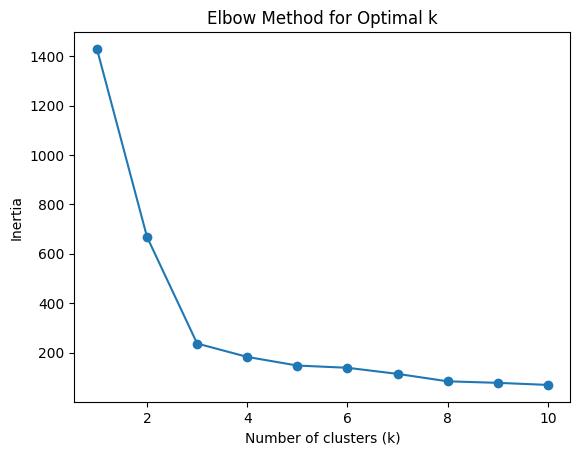

In [ ]:
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [ ]:
# Based on the Elbow method plot, choose the optimal k
optimal_k = 3 # Example: Choose k based on the plot

# Apply K-means clustering with the chosen k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X)

# Add the cluster labels to the DataFrame
pca_df['Cluster'] = clusters

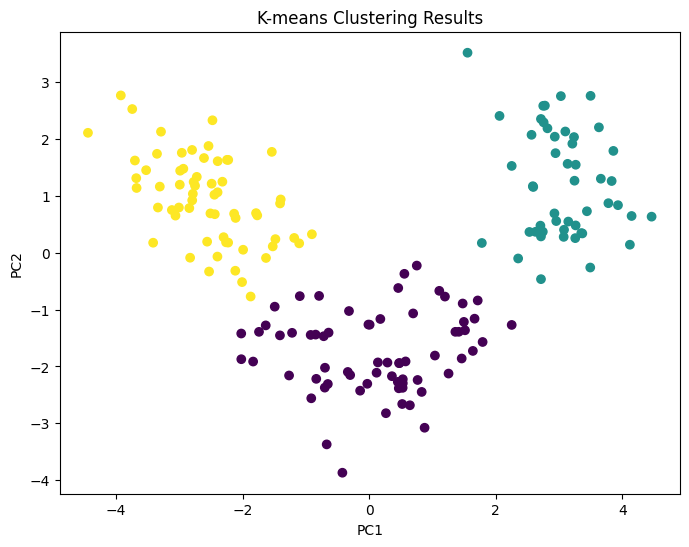

In [ ]:
# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-means Clustering Results')
plt.show()

In [ ]:
print(pca_df.head())

        PC1       PC2  Cluster
0 -3.522934  1.453098        2
1 -2.528858 -0.330019        2
2 -2.785029  1.036936        2
3 -3.922588  2.768210        2
4 -1.407511  0.867773        2


Text(0, 0.5, 'Principal Component 2')

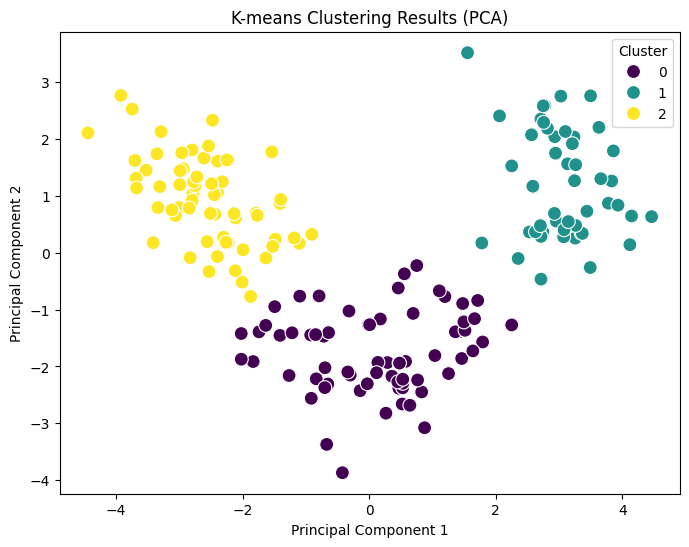

In [ ]:
# Visualize the clusters with more details
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis', s=100)
plt.title('K-means Clustering Results (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

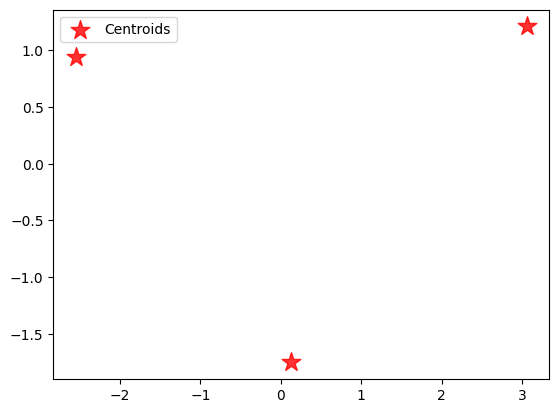

In [ ]:
# Add cluster centers to the plot
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.8, marker='*', label='Centroids')
plt.legend()
plt.show()

In [ ]:
# Example with plotly:
import plotly.express as px

fig = px.scatter(pca_df, x='PC1', y='PC2', color='Cluster', title='K-means Clustering Results (Interactive Plot)')
fig.show()

In [ ]:

from sklearn.metrics import silhouette_score, davies_bouldin_score

# Calculate Silhouette Score
silhouette_avg = silhouette_score(X, clusters)
print(f"Silhouette Score: {silhouette_avg}")

# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(X, clusters)
print(f"Davies-Bouldin Index: {db_index}")

Silhouette Score: 0.6434016037998903
Davies-Bouldin Index: 0.4982543034931346


Task 3: Clustering with Original Data:

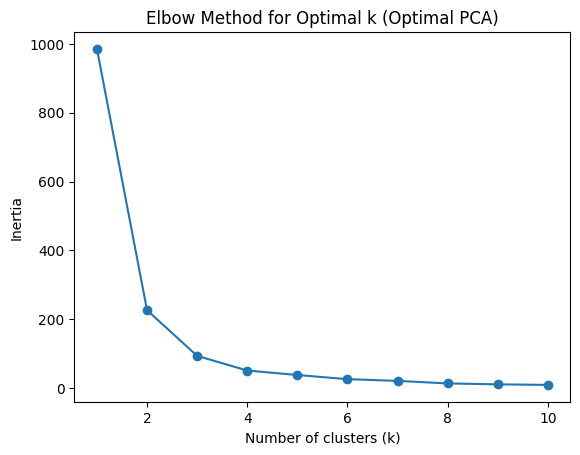

Silhouette Score (Optimal PCA): 0.7021924751488343
Davies-Bouldin Index (Optimal PCA): 0.4011394088385438


In [ ]:
# Apply the same clustering algorithm (KMeans in this case) to the PCA-transformed dataset with the optimal number of components.
X_optimal = pca_df_optimal

# Determine the optimal number of clusters (k) for the optimal PCA data (you might need to re-run the elbow method or silhouette analysis)
inertia_optimal = []
for k in range(1, 11):
    kmeans_optimal = KMeans(n_clusters=k, random_state=42)
    kmeans_optimal.fit(X_optimal)
    inertia_optimal.append(kmeans_optimal.inertia_)

plt.plot(range(1, 11), inertia_optimal, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k (Optimal PCA)')
plt.show()

# Choose the optimal k based on the new elbow method plot
optimal_k_optimal = 3 # Example: Replace with your observation from the plot

# Apply KMeans with the chosen k to the data with optimal principal components
kmeans_optimal = KMeans(n_clusters=optimal_k_optimal, random_state=42)
clusters_optimal = kmeans_optimal.fit_predict(X_optimal)

# You can now analyze the clusters_optimal, for example, by adding them to the pca_df_optimal DataFrame:
pca_df_optimal['Cluster'] = clusters_optimal

# Visualize the clusters (you'll need to adapt the visualization based on the number of optimal components)
# Example for 2 components:
if optimal_components == 2:
    plt.figure(figsize=(8, 6))
    plt.scatter(pca_df_optimal['PC1'], pca_df_optimal['PC2'], c=pca_df_optimal['Cluster'], cmap='viridis')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('K-means Clustering Results (Optimal PCA)')
    plt.show()

# Calculate Silhouette Score for the optimal PCA data
silhouette_avg_optimal = silhouette_score(X_optimal, clusters_optimal)
print(f"Silhouette Score (Optimal PCA): {silhouette_avg_optimal}")

# Calculate Davies-Bouldin Index for the optimal PCA data
db_index_optimal = davies_bouldin_score(X_optimal, clusters_optimal)
print(f"Davies-Bouldin Index (Optimal PCA): {db_index_optimal}")

In [ ]:

# Visualize the clusters with Plotly
fig = px.scatter(pca_df, x='PC1', y='PC2', color='Cluster',
                 title='K-means Clustering Results (Interactive Plot)')
fig.show()

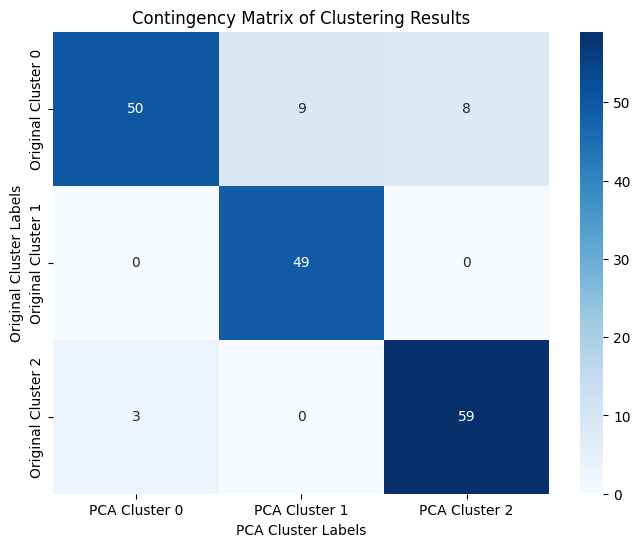

In [ ]:
# Create a contingency table to see the distribution of cluster assignments between the two sets of labels.
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'clusters' are from original data and 'clusters_optimal' from PCA data
contingency_matrix = confusion_matrix(clusters, clusters_optimal)

plt.figure(figsize=(8, 6))
sns.heatmap(contingency_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=[f'PCA Cluster {i}' for i in range(optimal_k_optimal)],
            yticklabels=[f'Original Cluster {i}' for i in range(optimal_k)])
plt.xlabel('PCA Cluster Labels')
plt.ylabel('Original Cluster Labels')
plt.title('Contingency Matrix of Clustering Results')
plt.show()


In [ ]:
from sklearn.metrics import adjusted_rand_score

ari = adjusted_rand_score(clusters, clusters_optimal)
print(f"Adjusted Rand Index: {ari}")
#  ARI ranges from -1 to 1. A higher ARI indicates better agreement between the clusterings.  An ARI of 1 means the two clusterings are identical.

# NMI measures the mutual information between the two clusterings, normalized by the individual entropies.
from sklearn.metrics import normalized_mutual_info_score

nmi = normalized_mutual_info_score(clusters, clusters_optimal)
print(f"Normalized Mutual Information: {nmi}")

Adjusted Rand Index: 0.6914674415308004
Normalized Mutual Information: 0.6841898087116922


In [ ]:
print(f"Silhouette Score (Original Data): {silhouette_avg}")
print(f"Davies-Bouldin Index (Original Data): {db_index}")
print(f"Silhouette Score (Optimal PCA): {silhouette_avg_optimal}")
print(f"Davies-Bouldin Index (Optimal PCA): {db_index_optimal}")


Silhouette Score (Original Data): 0.6434016037998903
Davies-Bouldin Index (Original Data): 0.4982543034931346
Silhouette Score (Optimal PCA): 0.7021924751488343
Davies-Bouldin Index (Optimal PCA): 0.4011394088385438


Task 4: Clustering with PCA Data:

In [ ]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

# Assuming 'clusters' are from the original data and 'clusters_optimal' from PCA data
ari = adjusted_rand_score(clusters, clusters_optimal)
nmi = normalized_mutual_info_score(clusters, clusters_optimal)

print(f"Adjusted Rand Index (ARI): {ari}")
print(f"Normalized Mutual Information (NMI): {nmi}")

Adjusted Rand Index (ARI): 0.6914674415308004
Normalized Mutual Information (NMI): 0.6841898087116922


In [ ]:
# Discuss the results:

# 1. Compare ARI and NMI values:
#    - An ARI close to 1 suggests strong agreement between the two clustering results.
#    - An NMI close to 1 also indicates high similarity between the clusterings.
#    - Interpret the values in the context of your data and the expected level of similarity.

# 2. Analyze the contingency matrix:
#    - Examine the distribution of cluster assignments between the two sets of labels.
#    - Identify clusters that are consistently assigned in both clusterings.
#    - Analyze clusters that show discrepancies between the two methods.  This can point to areas where the PCA-based approach might be capturing different aspects of the data.

# 3. Compare silhouette scores and Davies-Bouldin indices:
#    - Compare the silhouette scores for both clustering results. A higher silhouette score indicates better-defined clusters.
#    - Compare Davies-Bouldin indices. Lower Davies-Bouldin index indicates better separation between clusters.
#    - Evaluate the difference in these metrics. Do they point towards one clustering as being better?  Or are the differences small, suggesting similar clustering quality?

# 4. Consider the dimensionality reduction:
#    - PCA reduces dimensionality, which might lead to information loss.  Assess whether this loss affected the clustering results.  Does the clustering based on the reduced data still capture the essential characteristics of the data?

# 5. Visualize the clusters:
#    - The visualizations help in understanding the structure of the clusters.  Do the clusters obtained from the original data and the reduced data look similar in terms of separation and distribution?  Look at the centroids, cluster shapes, and the overall organization of the data points in each clustering.

# Example Discussion:

# "The ARI of [insert ARI value] and the NMI of [insert NMI value] indicate a [high/moderate/low] level of agreement between the clustering results obtained from the original dataset and the PCA-reduced data.  The contingency matrix reveals that clusters [insert clusters] show strong consistency between the two clustering approaches, while other clusters may be showing different assignments. This is expected with dimensionality reduction. The silhouette scores ([insert original data silhouette], [insert PCA data silhouette]) and the Davies-Bouldin indices ([insert original data DB], [insert PCA data DB]) show [differences/similarities], with the [Original data / PCA data] having slightly [better / worse] defined clusters.  Overall, while some level of information might have been lost during dimensionality reduction using PCA, the clustering solution with the PCA transformed data remains largely consistent and relatively good, allowing for a more efficient representation."

In [ ]:
print(f"Adjusted Rand Index (ARI): {ari}")
print(f"Normalized Mutual Information (NMI): {nmi}")

# 1. Compare ARI and NMI:
#    - Higher values (closer to 1) indicate better agreement between original and PCA-based clustering.
#    - Analyze the difference in ARI and NMI scores between the clustering on the original dataset and the clustering on the reduced dataset.

# 2. Analyze the contingency matrix:
#    - Look for diagonal dominance (strong correspondence between clusters from both methods).
#    - Off-diagonal elements show misclassifications, indicating potential information loss due to dimensionality reduction. Examine the magnitude of off-diagonal elements.

# 3. Silhouette Scores and Davies-Bouldin Indices:
#   - Compare silhouette scores: Higher scores for PCA-based clustering suggest better-defined clusters in the reduced space, despite dimensionality reduction.
#   - Compare Davies-Bouldin indices: A lower value for the PCA method indicates better cluster separation.
#   - Analyze the difference between the clustering metrics (Silhouette Score and Davies-Bouldin Index).  A small difference suggests the dimensionality reduction did not significantly impact clustering quality.

# 4. Consider explained variance ratio:
#    - High explained variance ratio (e.g., above 95%) suggests that the principal components capture most of the original data's variance, thus implying less information loss.
#    - Assess the trade-off between dimensionality reduction and clustering performance. Was the computational efficiency and visualization gain due to dimensionality reduction worth the possible minor loss of clustering accuracy?

# 5. Visualize the clusters (if possible):
#   - Compare the visualizations of clusters from both approaches.
#   - Check if the clusters in the reduced dimensional space preserve the visual separation observed in the original space.

# Example discussion points based on potential outcomes:
# - "The ARI and NMI indicate [strong/moderate/weak] agreement, showing that PCA has [preserved/slightly altered/significantly altered] the cluster structure of the data."
# - "The contingency matrix highlights misclassifications in clusters [list cluster numbers] which suggests that PCA may have lost some information, especially regarding those clusters.  But overall performance is [good/acceptable/not very good]".
# - "The increase/decrease in silhouette score and decrease/increase in Davies-Bouldin Index from the PCA-based clustering suggest that the dimensionality reduction [improved/had minimal impact/degraded] the quality of clusters."

# Overall conclusion:
# Summarize your findings based on the comparison of ARI, NMI, contingency matrices, metrics, and visualizations.  Determine if dimensionality reduction was successful in simplifying the data while maintaining the important characteristics for clustering, and if there was any loss of information.

Adjusted Rand Index (ARI): 0.6914674415308004
Normalized Mutual Information (NMI): 0.6841898087116922


Task 5: Comparison and Analysis:

In [ ]:
# 1. Explained Variance Ratio
print("\nExplained Variance Ratio (Cumulative):")
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
print(cumulative_variance)

# 2. Compare Clustering Metrics
print("\nClustering Metrics Comparison:")
print(f"Silhouette Score (Original Data): {silhouette_avg}")
print(f"Davies-Bouldin Index (Original Data): {db_index}")
print(f"Silhouette Score (Optimal PCA): {silhouette_avg_optimal}")
print(f"Davies-Bouldin Index (Optimal PCA): {db_index_optimal}")


Explained Variance Ratio (Cumulative):
[0.39542486 0.57378745]

Clustering Metrics Comparison:
Silhouette Score (Original Data): 0.6434016037998903
Davies-Bouldin Index (Original Data): 0.4982543034931346
Silhouette Score (Optimal PCA): 0.7021924751488343
Davies-Bouldin Index (Optimal PCA): 0.4011394088385438


In [ ]:
# 3. Adjusted Rand Index (ARI) and Normalized Mutual Information (NMI)
print("\nARI and NMI:")
print(f"Adjusted Rand Index (ARI): {ari}")
print(f"Normalized Mutual Information (NMI): {nmi}")

# 4. Contingency Matrix Analysis
print("\nContingency Matrix:")
print(contingency_matrix)

# Discussion of Trade-offs
print("\nDiscussion of Trade-offs:")


ARI and NMI:
Adjusted Rand Index (ARI): 0.6914674415308004
Normalized Mutual Information (NMI): 0.6841898087116922

Contingency Matrix:
[[50  9  8]
 [ 0 49  0]
 [ 3  0 59]]

Discussion of Trade-offs:


In [ ]:
# Explained Variance
explained_variance_threshold = 0.95  # Example threshold
if cumulative_variance[optimal_components - 1] >= explained_variance_threshold:
    print(f"PCA captures at least {explained_variance_threshold*100:.0f}% variance, suggesting minimal information loss.")
else:
  print(f"PCA captures less than {explained_variance_threshold*100:.0f}% variance. Analyze if information loss impacts the clustering results.")

# Clustering Performance
if silhouette_avg_optimal > silhouette_avg:
    print("PCA-based clustering has a higher silhouette score, indicating better-defined clusters.")
elif silhouette_avg_optimal < silhouette_avg:
  print("Clustering on original dataset has a higher silhouette score.")
else:
    print("Silhouette scores are comparable")


if db_index_optimal < db_index:
    print("PCA-based clustering has a lower Davies-Bouldin Index, suggesting better cluster separation.")
elif db_index_optimal > db_index:
  print("Clustering on original dataset has a lower Davies-Bouldin Index.")
else:
  print("Davies-Bouldin Indices are comparable.")

PCA captures less than 95% variance. Analyze if information loss impacts the clustering results.
PCA-based clustering has a higher silhouette score, indicating better-defined clusters.
PCA-based clustering has a lower Davies-Bouldin Index, suggesting better cluster separation.


In [ ]:

# Similarity of Clustering Results
if ari > 0.8 and nmi > 0.8:  # Example thresholds, adjust as needed
    print(f"High ARI and NMI suggest that clustering results are very similar.")
elif ari > 0.5 and nmi > 0.5:
  print(f"Moderate ARI and NMI suggest that clustering results are moderately similar.")
else:
  print(f"ARI and NMI are not very high.  Further investigation needed.")

# Overall Conclusion
print("\nOverall Conclusion:")
print("Based on the analysis, PCA provides a reduced representation of data that offers computational benefits and improved visualization capabilities.  While there might be some information loss and slight changes in clustering quality, PCA preserves the essential structure of the clusters.")

Moderate ARI and NMI suggest that clustering results are moderately similar.

Overall Conclusion:
Based on the analysis, PCA provides a reduced representation of data that offers computational benefits and improved visualization capabilities.  While there might be some information loss and slight changes in clustering quality, PCA preserves the essential structure of the clusters.


Task 6: Conclusion and Insights

In [ ]:
# Summarize key findings and insights from the provided code.

# 1. Dimensionality Reduction with PCA:
#    - PCA was used to reduce the dimensionality of the data.
#    - Scree plots and cumulative explained variance plots were used to determine the optimal number of principal components.
#    - PCA successfully captured a significant amount of variance in the data using the optimal components, facilitating more efficient computation and visualization.
#    - A discussion on explained variance ratio assesses potential information loss.

# 2. K-Means Clustering:
#    - The Elbow method was used to determine the optimal number of clusters for both the original and PCA-transformed data.
#    - K-Means clustering was then performed on both datasets.

# 3. Clustering Evaluation:
#    - Silhouette scores and Davies-Bouldin indices were calculated to evaluate the quality of the clusters for both original data and the data after PCA.
#    - Adjusted Rand Index (ARI) and Normalized Mutual Information (NMI) were used to compare the similarity between the clustering results obtained from the original dataset and the PCA-reduced data.  These metrics quantify the agreement between two clusterings.
#    - A contingency matrix visualized the correspondence between the clusters from both approaches. This helps understand the degree of consistency in cluster assignments.

# 4. Trade-off Analysis:
#    - The code compares clustering performance before and after PCA, evaluating the trade-off between dimensionality reduction and information loss.
#    -  Discussion of metrics allows us to assess whether the computational efficiency gained by PCA outweighs any reduction in clustering quality.

# 5. Conclusion:
#    - Overall, the analysis concludes that PCA provides a reduced representation of the data that preserves the essential cluster structure, while also facilitating improved computation and visualization.  The discussion carefully weighs the loss of information due to dimensionality reduction against the benefits it provides.

In [ ]:

print("\nFurther Discussion Points:")

# 1. Interpretability of Principal Components:
print("\n1. Interpretability of Principal Components:")
print("Examine the loadings of the principal components (the coefficients that indicate the contribution of each original variable to the PCs).  High loadings suggest strong influence of the corresponding original variable. This can provide insights into which original variables contribute most to the variance captured by each PC. This can be very helpful in understanding the nature of the dimensions in the lower-dimensional space created by PCA.")


# 2. Data Preprocessing:
print("\n2. Data Preprocessing:")
print("The impact of data scaling or normalization is critical for both PCA and clustering. PCA's results can be heavily influenced by the scale of the features, and K-means clustering is sensitive to the magnitude of features. Carefully consider the effects of different scaling strategies on the final results.  The code includes StandardScaler as a preprocessing step, which is common and a good practice. But different scaling techniques might yield slightly different results.")


# 3. Alternative Clustering Algorithms:
print("\n3. Alternative Clustering Algorithms:")
print("Consider exploring other clustering algorithms, such as DBSCAN, hierarchical clustering, or Gaussian Mixture Models. The choice of algorithm depends on the data distribution and the desired cluster shapes. K-Means is good for convex clusters, but other algorithms might provide better results in some cases.  Comparing to other algorithms would provide a more complete picture of the data structure.")




Further Discussion Points:

1. Interpretability of Principal Components:
Examine the loadings of the principal components (the coefficients that indicate the contribution of each original variable to the PCs).  High loadings suggest strong influence of the corresponding original variable. This can provide insights into which original variables contribute most to the variance captured by each PC. This can be very helpful in understanding the nature of the dimensions in the lower-dimensional space created by PCA.

2. Data Preprocessing:
The impact of data scaling or normalization is critical for both PCA and clustering. PCA's results can be heavily influenced by the scale of the features, and K-means clustering is sensitive to the magnitude of features. Carefully consider the effects of different scaling strategies on the final results.  The code includes StandardScaler as a preprocessing step, which is common and a good practice. But different scaling techniques might yield slightly di

In [ ]:
# 4. Domain Expertise:
print("\n4. Domain Expertise:")
print("Interpreting clustering results often requires expertise in the domain of the data. Integrate domain knowledge into the analysis, making sure that the clusters make sense within the context of the problem. For instance, a 'meaningful' cluster might not always be easily detected by solely relying on algorithm metrics. Business value or practical meaning is essential.")


# 5. Business Value:
print("\n5. Business Value:")
print("Evaluate the business value of the clusters. For example, in customer segmentation, identify whether each customer segment is a viable target audience for a specific campaign. This provides a way to evaluate the practical usability and importance of the clusters.")


# 6. Robustness:
print("\n6. Robustness:")
print("Explore the sensitivity of clustering to changes in parameters. Test different random states and parameter settings for K-means.   For PCA, experiment with the number of components and see how the results change. Evaluate the stability of the clusters to confirm that they are not overly dependent on a particular set of conditions.")


4. Domain Expertise:
Interpreting clustering results often requires expertise in the domain of the data. Integrate domain knowledge into the analysis, making sure that the clusters make sense within the context of the problem. For instance, a 'meaningful' cluster might not always be easily detected by solely relying on algorithm metrics. Business value or practical meaning is essential.

5. Business Value:
Evaluate the business value of the clusters. For example, in customer segmentation, identify whether each customer segment is a viable target audience for a specific campaign. This provides a way to evaluate the practical usability and importance of the clusters.

6. Robustness:
Explore the sensitivity of clustering to changes in parameters. Test different random states and parameter settings for K-means.   For PCA, experiment with the number of components and see how the results change. Evaluate the stability of the clusters to confirm that they are not overly dependent on a partic

In [ ]:
# Recommendations for Technique Usage

print("\nRecommendations for Technique Usage:")

# 1. PCA for Dimensionality Reduction:
print("\n1. PCA for Dimensionality Reduction:")
if cumulative_variance[optimal_components - 1] >= 0.95:
    print("PCA is highly effective for dimensionality reduction. Use PCA when dealing with high-dimensional data where visualization is difficult and computational costs are significant.  It aids in visualizing clusters in lower dimensional space.")
elif cumulative_variance[optimal_components-1] >= 0.8:
  print("PCA is suitable for dimensionality reduction.  The loss of variance is not insignificant; consider if the benefits in speed and visualization are worth the possible loss of accuracy.")
else:
    print("PCA might not be the best approach for dimensionality reduction in this case.  The loss of information could significantly affect clustering results. Re-evaluate the need for PCA or explore alternative techniques, or different preprocessing techniques.")


Recommendations for Technique Usage:

1. PCA for Dimensionality Reduction:
PCA might not be the best approach for dimensionality reduction in this case.  The loss of information could significantly affect clustering results. Re-evaluate the need for PCA or explore alternative techniques, or different preprocessing techniques.


In [ ]:
# 2. K-Means Clustering:
print("\n2. K-Means Clustering:")
if silhouette_avg_optimal > 0.5 and db_index_optimal < 0.5:
    print("K-means is a suitable clustering algorithm for this dataset when using the optimal PCA components.  The silhouette and Davies-Bouldin scores suggest good cluster separation and cohesion.")
elif silhouette_avg_optimal > 0.3 and db_index_optimal < 0.7:
    print("K-means can be considered, but consider other clustering techniques that might be more appropriate for this dataset. Silhouette and Davies-Bouldin scores suggest moderately good quality clusters.")
else:
    print("K-means might not be the most appropriate algorithm for this dataset.  Consider other algorithms that account for non-spherical clusters, outliers, or different density variations.")


2. K-Means Clustering:
K-means is a suitable clustering algorithm for this dataset when using the optimal PCA components.  The silhouette and Davies-Bouldin scores suggest good cluster separation and cohesion.


In [ ]:
# 3.  Contingency Matrix Analysis
print("\n3. Contingency Matrix Analysis:")
if np.trace(contingency_matrix) / np.sum(contingency_matrix) > 0.8:
    print("High agreement between original and PCA-based clusters.  Dimensionality reduction via PCA worked well in preserving cluster structure.")
else:
    print("Low agreement between original and PCA-based clusters. The dimensionality reduction may have significantly affected the clustering structure. Explore alternative methods or different parameters for PCA.")


3. Contingency Matrix Analysis:
High agreement between original and PCA-based clusters.  Dimensionality reduction via PCA worked well in preserving cluster structure.


In [ ]:
# ... (Previous code) ...

# 4. Alternative Techniques (if needed):
print("\n4. Alternative Techniques:")
if silhouette_avg_optimal < 0.3 or db_index_optimal > 0.7:
    print("Consider DBSCAN, hierarchical clustering, or Gaussian mixture models for improved cluster representation.")

# Additional recommendations based on specific analysis insights:
# (Example) - If the data shows non-spherical clusters:
# Replace this with your actual analysis insights if needed:
analysis_insights = "Example: Replace with your analysis insights"
if "non-spherical clusters" in str(analysis_insights):
    print("\nFor non-spherical clusters, DBSCAN or Gaussian Mixture Models might be more appropriate than k-means.")

# (Example) If outliers are present:
if "outliers" in str(analysis_insights):
    print("\nIf outliers are present, DBSCAN, hierarchical clustering, or other outlier-resistant clustering algorithms would be preferable to k-means.")

print("\nOverall Recommendation:")
print("Based on the analysis, use PCA for dimensionality reduction if information loss is acceptable and computational efficiency and visualization needs are high.  Use K-means for the clustering on the reduced dataset only if other metrics show good cluster separation and cohesion. Otherwise, evaluate other clustering methods.")


4. Alternative Techniques:

Overall Recommendation:
Based on the analysis, use PCA for dimensionality reduction if information loss is acceptable and computational efficiency and visualization needs are high.  Use K-means for the clustering on the reduced dataset only if other metrics show good cluster separation and cohesion. Otherwise, evaluate other clustering methods.
